In [2]:
!pip3 install lifelines

  Using cached lifelines-0.30.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached autograd-1.7.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-1.0.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
Using cached lifelines-0.30.0-py3-none-any.whl (349 kB)
Using cached autograd-1.7.0-py3-none-any.whl (52 kB)
Using cached formulaic-1.0.2-py3-none-any.whl (94 kB)
Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.73 0.39      1.35


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/189769633.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data[data['Group'] == 1][data['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/189769633.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data[data['Group'] == 2][data['Task'] == i]


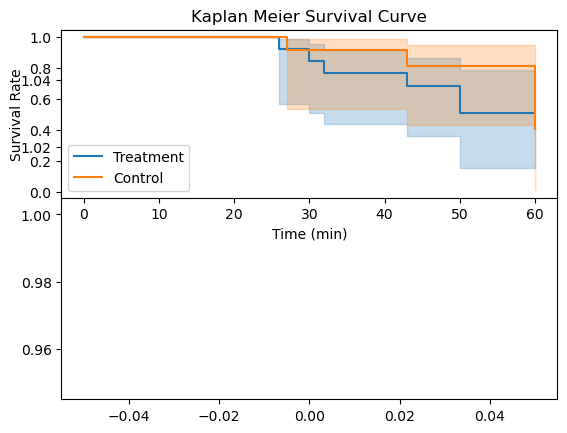

In [15]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from scipy.interpolate import interp1d
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Load data from CSV file
#data = pd.read_csv('./data/Milestones_survival.csv')
#data = pd.read_csv('./data/Milestones_survival_asap.csv')
data = pd.read_csv('./data/Milestones_survival_asap_All.csv')
tasks = 1
time_col = 'Time'
event_col = 'Success'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data[data['Group'] == 1][data['Task'] == i]
	group2_data = data[data['Group'] == 2][data['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate')
	print(logrank_test(group1_data['Time'], group2_data['Time'], event_observed_A=group1_data['Success'], event_observed_B=group2_data['Success']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


In [ ]:
data_60 = data.copy()


# Replace NaNs with the mean of the column where it is located
# the mean calculated above is 110, so NaN values will be replaced with 110
#data_60['issue'] = data['issue'].fillna(60)
#data_60['problem'] = data['problem'].fillna(60)
data_60['file'] = data['file'].fillna(60)
data_60['file'] = data['file'].fillna(60)
data_60['class'] = data['class'].fillna(60)
data_60['method'] = data['method'].fillna(60)
data_60['line'] = data['line'].fillna(60)
data_60['solution'] = data['solution'].fillna(60)
data_60['implement'] = data['implement'].fillna(60)
#data_60['end'] = data['end'].fillna(60)

data_60

,Group,Task,Time,Success,folder,file,class,method,line,solution,implement,right folder,right file,right class,right method,right lines,correct,sound solution
0,2,1,43,0,18.0,18.0,19.0,21.0,21.0,24.0,43.0,1,1,1,0,0,0,0
1,1,1,50,1,44.0,45.0,45.0,46.0,47.0,48.0,50.0,1,1,1,1,1,1,1
2,2,1,58,0,56.0,56.0,58.0,60.0,60.0,60.0,60.0,0,0,0,0,0,0,0
3,1,1,46,0,23.0,23.0,23.0,27.0,27.0,46.0,46.0,0,0,0,0,0,0,1
4,2,1,56,0,38.0,38.0,38.0,41.0,41.0,50.0,56.0,0,0,0,0,0,0,0
5,1,1,38,0,31.0,31.0,31.0,32.0,33.0,37.0,38.0,0,0,0,0,0,0,1
6,2,1,19,0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,0,0,0,0,0,0,0
7,1,1,46,0,35.0,35.0,35.0,37.0,37.0,37.0,46.0,0,0,0,0,0,0,1
8,1,1,43,1,43.0,43.0,43.0,43.0,43.0,43.0,43.0,1,1,1,1,1,1,1
9,2,1,57,0,25.0,25.0,37.0,46.0,57.0,57.0,60.0,0,0,0,0,0,0,1


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.62 0.43      1.21


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/1555575493.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/1555575493.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


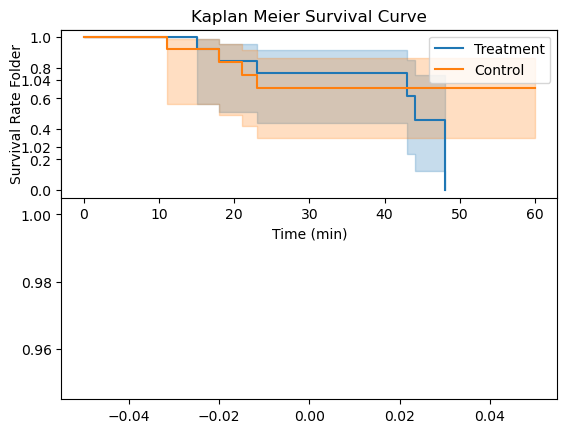

In [21]:
tasks = 1
time_col = 'folder'
event_col = 'right folder'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate Folder')
	print(logrank_test(group1_data['folder'], group2_data['folder'], event_observed_A=group1_data['right folder'], event_observed_B=group2_data['right folder']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/1380478665.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/1380478665.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.85      0.23


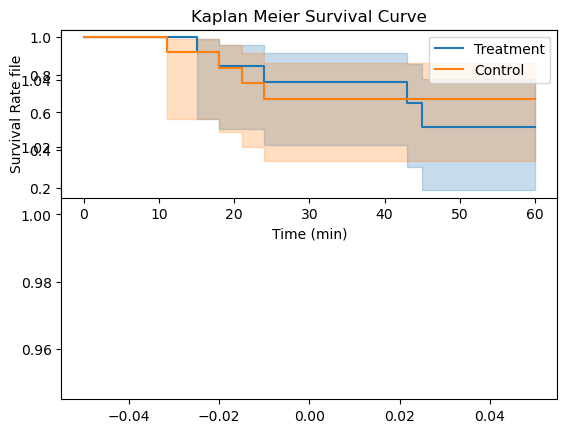

In [22]:
tasks = 1
time_col = 'file'
event_col = 'right file'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate file')
	print(logrank_test(group1_data['file'], group2_data['file'], event_observed_A=group1_data['right file'], event_observed_B=group2_data['right file']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.05 0.82      0.29


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/3344868954.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/3344868954.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


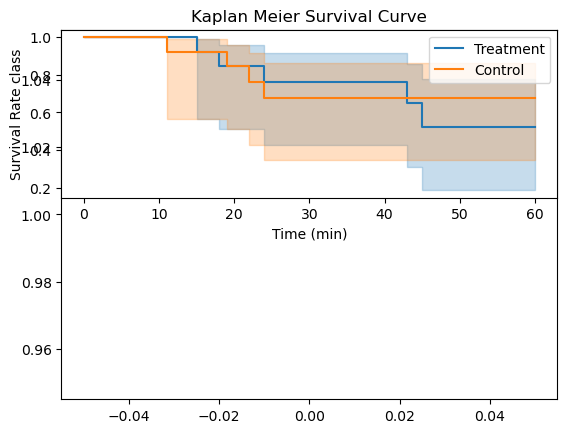

In [23]:
tasks = 1
time_col = 'class'
event_col = 'right class'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate class')
	print(logrank_test(group1_data['class'], group2_data['class'], event_observed_A=group1_data['right class'], event_observed_B=group2_data['right class']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.31 0.58      0.80


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/4052164131.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/4052164131.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


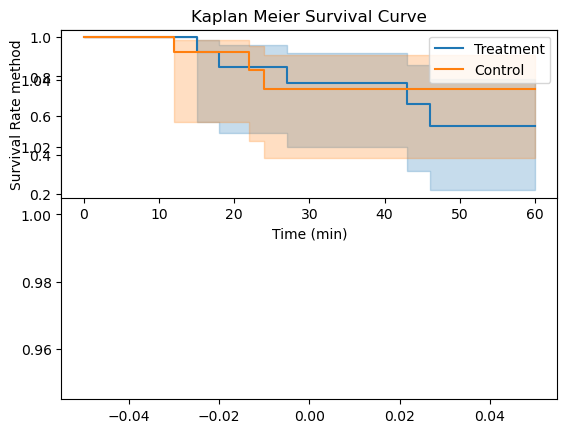

In [24]:
tasks = 1
time_col = 'method'
event_col = 'right method'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate method')
	print(logrank_test(group1_data['method'], group2_data['method'], event_observed_A=group1_data['right method'], event_observed_B=group2_data['right method']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.38 0.54      0.89


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/2355490707.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/2355490707.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


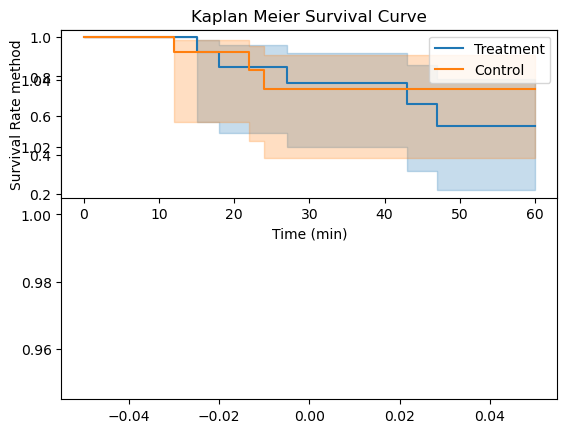

In [27]:
tasks = 1
time_col = 'line'
event_col = 'right lines'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate method')
	print(logrank_test(group1_data['line'], group2_data['line'], event_observed_A=group1_data['right lines'], event_observed_B=group2_data['right lines']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.58 0.01      6.60


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/4219571192.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/4219571192.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


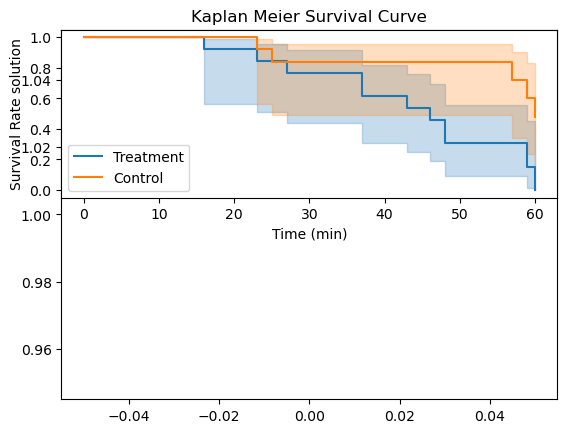

In [28]:
tasks = 1
time_col = 'solution'
event_col = 'sound solution'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate solution')
	print(logrank_test(group1_data['solution'], group2_data['solution'], event_observed_A=group1_data['sound solution'], event_observed_B=group2_data['sound solution']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.05 0.31      1.71


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/821698252.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_7070/821698252.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


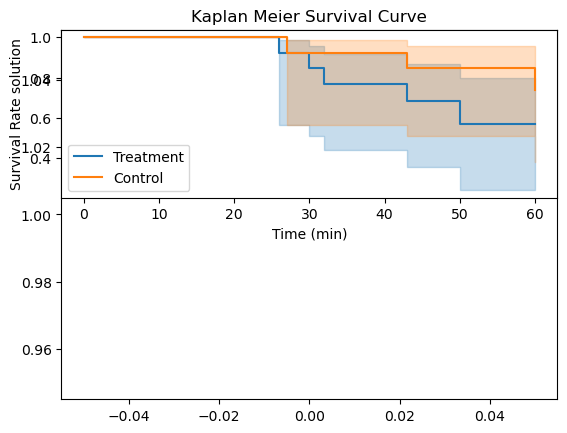

In [29]:
tasks = 1
time_col = 'implement'
event_col = 'correct'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate solution')
	print(logrank_test(group1_data['implement'], group2_data['implement'], event_observed_A=group1_data['correct'], event_observed_B=group2_data['correct']))


plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()
